<a href="https://colab.research.google.com/github/abdulaziz-ibrahim27/activity_baseline_model/blob/main/activity_base_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import some basic libraries
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
!nvidia-smi

Tue Sep 13 17:37:25 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!wget https://raw.githubusercontent.com/abdulaziz-ibrahim27/activity_baseline_model/main/merged_dataset.csv

--2022-09-13 17:37:25--  https://raw.githubusercontent.com/abdulaziz-ibrahim27/activity_baseline_model/main/merged_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2405509 (2.3M) [text/plain]
Saving to: ‘merged_dataset.csv’

merged_dataset.csv  100%[===================>]   2.29M  --.-KB/s    in 0.009s  

2022-09-13 17:37:26 (252 MB/s) - ‘merged_dataset.csv’ saved [2405509/2405509]



In [4]:
df = pd.read_csv('merged_dataset.csv')
df.head()

,ACCELEROMETER X (m/s²),ACCELEROMETER Y (m/s²),ACCELEROMETER Z (m/s²),GRAVITY X (m/s²),GRAVITY Y (m/s²),GRAVITY Z (m/s²),LINEAR ACCELERATION X (m/s²),LINEAR ACCELERATION Y (m/s²),LINEAR ACCELERATION Z (m/s²),GYROSCOPE X (rad/s),GYROSCOPE Y (rad/s),GYROSCOPE Z (rad/s),TimeSinceStartinms,YYYY-MO-DD HH-MI-SS_SSS,Activity
0,-0.8857,-0.9150,9.5503,-1.1034,-0.0603,9.7442,-0.6645,0.8831,0.6781,-1.0842,-1.7585,0.1958,8,2021-03-19 12:15:58:176,Cycling
1,-0.8139,1.2541,9.4306,-0.5532,1.0615,9.7333,-1.8757,0.1955,-0.1211,0.2783,-0.5358,1.6936,508,2021-03-19 12:15:58:676,Cycling
2,-10.2466,-11.1079,16.0610,0.9801,6.8492,-6.9497,4.7212,-7.9441,-9.0559,-1.0009,-2.9897,-6.4581,1007,2021-03-19 12:15:59:175,Cycling
3,-4.3679,-7.6616,-4.6180,3.5523,-8.1039,-4.2283,2.8049,-3.7581,-7.1497,0.0703,-0.1928,-0.3580,1508,2021-03-19 12:15:59:676,Cycling
4,5.0936,-7.1863,-5.2249,4.0020,-8.0153,-3.9886,5.1214,-3.4253,3.9980,-0.4245,0.0546,0.3329,2008,2021-03-19 12:16:00:176,Cycling


In [5]:
df_drop_col = df.drop(['YYYY-MO-DD HH-MI-SS_SSS', 'TimeSinceStartinms', 'Activity'], axis = 1)
df_drop_col.head()

,ACCELEROMETER X (m/s²),ACCELEROMETER Y (m/s²),ACCELEROMETER Z (m/s²),GRAVITY X (m/s²),GRAVITY Y (m/s²),GRAVITY Z (m/s²),LINEAR ACCELERATION X (m/s²),LINEAR ACCELERATION Y (m/s²),LINEAR ACCELERATION Z (m/s²),GYROSCOPE X (rad/s),GYROSCOPE Y (rad/s),GYROSCOPE Z (rad/s)
0,-0.8857,-0.9150,9.5503,-1.1034,-0.0603,9.7442,-0.6645,0.8831,0.6781,-1.0842,-1.7585,0.1958
1,-0.8139,1.2541,9.4306,-0.5532,1.0615,9.7333,-1.8757,0.1955,-0.1211,0.2783,-0.5358,1.6936
2,-10.2466,-11.1079,16.0610,0.9801,6.8492,-6.9497,4.7212,-7.9441,-9.0559,-1.0009,-2.9897,-6.4581
3,-4.3679,-7.6616,-4.6180,3.5523,-8.1039,-4.2283,2.8049,-3.7581,-7.1497,0.0703,-0.1928,-0.3580
4,5.0936,-7.1863,-5.2249,4.0020,-8.0153,-3.9886,5.1214,-3.4253,3.9980,-0.4245,0.0546,0.3329


In [11]:
labels = pd.get_dummies(df.Activity)

In [12]:
labels

,Cycling,Jogging,JumpRope,Pushups,Swimming,Walking,WalkingDownstairs,WalkingUpstairs
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
19264,0,0,0,0,0,0,1,0
19265,0,0,0,0,0,0,1,0
19266,0,0,0,0,0,0,1,0
19267,0,0,0,0,0,0,1,0


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_drop_col, labels, test_size = .20, random_state = 14)

In [19]:
X_train.shape, y_train.shape

((15415, 12), (15415, 8))

In [20]:
X_train

,ACCELEROMETER X (m/s²),ACCELEROMETER Y (m/s²),ACCELEROMETER Z (m/s²),GRAVITY X (m/s²),GRAVITY Y (m/s²),GRAVITY Z (m/s²),LINEAR ACCELERATION X (m/s²),LINEAR ACCELERATION Y (m/s²),LINEAR ACCELERATION Z (m/s²),GYROSCOPE X (rad/s),GYROSCOPE Y (rad/s),GYROSCOPE Z (rad/s)
13984,-0.9634,-0.8767,-1.9379,-0.8615,-9.0672,-3.6350,-0.2060,10.6590,7.2747,-0.7006,-3.3615,-0.6137
3670,-2.1126,-5.9043,-4.9424,-2.5395,-9.2102,-2.2120,-2.3750,1.6843,-4.2793,-1.9573,1.1233,0.8427
11953,0.4120,9.7280,-1.2330,1.5580,9.6820,-0.0330,-0.7280,0.0060,-0.9310,-0.1110,0.1310,-0.2660
1798,-10.0800,6.6250,-5.2460,-7.5640,3.9190,-4.8570,-1.6520,0.9830,-0.1940,-0.5000,1.0330,-0.4340
7220,-1.3920,-3.7783,-2.2729,-3.5986,-6.3833,-6.5172,1.4072,-6.6149,-0.9346,-3.7366,0.3267,0.6052
...,...,...,...,...,...,...,...,...,...,...,...,...
12025,-1.0080,8.2890,-3.2800,-0.2150,9.2630,-3.2130,-0.7930,-0.9740,-0.0670,0.2430,0.3160,0.1100
18838,2.8400,6.2010,0.3540,-3.9900,8.9160,-0.8720,6.8290,-2.7150,1.2270,-0.7960,0.6810,0.7100
9484,-0.6111,-1.3418,2.1173,3.9708,-8.9024,-1.0722,2.0290,2.4154,0.7812,-0.2650,-0.0980,-1.1652
13656,-2.0097,-0.5198,3.1448,-1.3827,-8.4400,-4.7984,-1.4218,5.6204,6.9335,-2.4350,-1.9588,-0.1225


In [21]:
y_train

,Cycling,Jogging,JumpRope,Pushups,Swimming,Walking,WalkingDownstairs,WalkingUpstairs
13984,0,0,0,0,0,1,0,0
3670,1,0,0,0,0,0,0,0
11953,0,0,0,0,1,0,0,0
1798,1,0,0,0,0,0,0,0
7220,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
12025,0,0,0,0,1,0,0,0
18838,0,0,0,0,0,0,1,0
9484,0,0,1,0,0,0,0,0
13656,0,0,0,0,0,1,0,0


In [25]:
X_train.columns

Index(['ACCELEROMETER X (m/s²)', 'ACCELEROMETER Y (m/s²)',
       'ACCELEROMETER Z (m/s²)', 'GRAVITY X (m/s²)', 'GRAVITY Y (m/s²)',
       'GRAVITY Z (m/s²)', 'LINEAR ACCELERATION X (m/s²)',
       'LINEAR ACCELERATION Y (m/s²)', 'LINEAR ACCELERATION Z (m/s²)',
       'GYROSCOPE X (rad/s)', 'GYROSCOPE Y (rad/s)', 'GYROSCOPE Z (rad/s)'],
      dtype='object')

In [22]:
X_train_tensor = tf.convert_to_tensor(X_train)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.float32)

In [23]:
X_train_tensor.shape, y_train_tensor.shape

(TensorShape([15415, 12]), TensorShape([15415, 8]))

In [28]:
# build model architecture - baseline feedfoward network
tf.random.set_seed(14)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = 'relu', input_shape =(12,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'softmax')
])
model.compile(loss = 'CategoricalCrossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
ff_history = model.fit(tf.expand_dims(X_train_tensor, axis = -1), y_train_tensor, epochs = 50) # here we fit the data
# tensor shape = (batch_size, (inputs_shape))

Epoch 1/50
482/482 [==============================] - 2s 3ms/step - loss: 0.9462 - accuracy: 0.6662
Epoch 2/50
482/482 [==============================] - 1s 3ms/step - loss: 0.7366 - accuracy: 0.7427
Epoch 3/50
482/482 [==============================] - 1s 2ms/step - loss: 0.6667 - accuracy: 0.7664
Epoch 4/50
482/482 [==============================] - 1s 2ms/step - loss: 0.6188 - accuracy: 0.7817
Epoch 5/50
482/482 [==============================] - 1s 3ms/step - loss: 0.5896 - accuracy: 0.7908
Epoch 6/50
482/482 [==============================] - 1s 3ms/step - loss: 0.5601 - accuracy: 0.8034
Epoch 7/50
482/482 [==============================] - 1s 3ms/step - loss: 0.5419 - accuracy: 0.8093
Epoch 8/50
482/482 [==============================] - 1s 2ms/step - loss: 0.5203 - accuracy: 0.8154
Epoch 9/50
482/482 [==============================] - 1s 2ms/step - loss: 0.5038 - accuracy: 0.8229
Epoch 10/50
482/482 [==============================] - 1s 2ms/step - loss: 0.4811 - accuracy: 0.8302

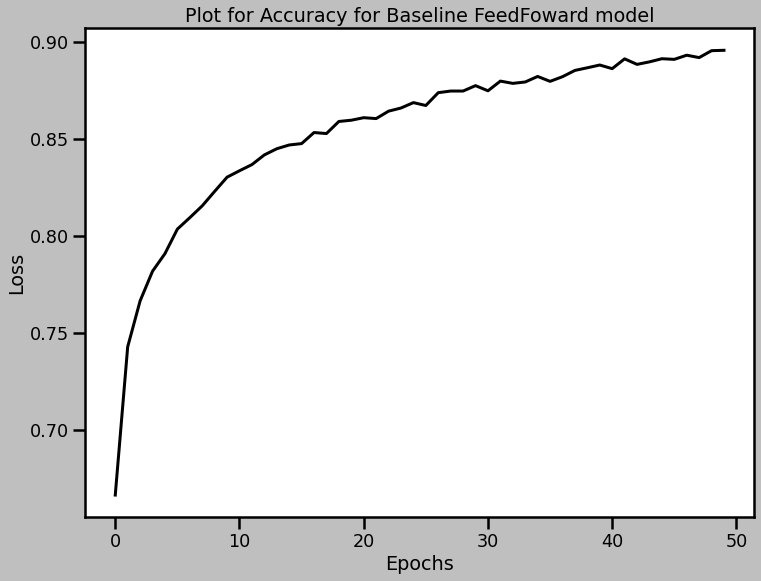

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('grayscale')
sns.set_context('poster', font_scale=.8)
pd.DataFrame(ff_history.history)['accuracy'].plot(figsize=(12,9));
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot for Accuracy for Baseline FeedFoward model');

In [30]:
ff_acc = model.evaluate(tf.expand_dims(X_test_tensor, axis = -1), y_test_tensor)[1] # here we evaluate

121/121 [==============================] - 0s 2ms/step - loss: 0.6165 - accuracy: 0.8251


In [31]:
# build model architecture - baseline CNN1D model
cnn_model = tf.keras.Sequential([ 
    tf.keras.layers.Input((12, 1)),
    tf.keras.layers.Conv1D(32, 2, activation='relu'),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation='softmax')
])

cnn_model.compile(loss='CategoricalCrossentropy',
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 11, 32)            96        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 32)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense_12 (Dense)            (None, 8)                 1288      
                                                                 
Total params: 1,384
Trainable params: 1,384
Non-trainable params: 0
_________________________________________________________________


In [34]:
x_final = tf.linalg.matrix_transpose(tf.expand_dims(X_test_tensor, axis = -1))
cnn_history= cnn_model.fit(tf.expand_dims(X_test_tensor, axis = -1), y_test_tensor, epochs=50)

Epoch 1/50
121/121 [==============================] - 0s 3ms/step - loss: 0.8288 - accuracy: 0.7200
Epoch 2/50
121/121 [==============================] - 0s 3ms/step - loss: 0.8216 - accuracy: 0.7109
Epoch 3/50
121/121 [==============================] - 0s 3ms/step - loss: 0.8201 - accuracy: 0.7221
Epoch 4/50
121/121 [==============================] - 0s 3ms/step - loss: 0.8199 - accuracy: 0.7187
Epoch 5/50
121/121 [==============================] - 0s 3ms/step - loss: 0.8195 - accuracy: 0.7211
Epoch 6/50
121/121 [==============================] - 0s 3ms/step - loss: 0.8124 - accuracy: 0.7193
Epoch 7/50
121/121 [==============================] - 0s 3ms/step - loss: 0.8085 - accuracy: 0.7247
Epoch 8/50
121/121 [==============================] - 0s 3ms/step - loss: 0.8105 - accuracy: 0.7231
Epoch 9/50
121/121 [==============================] - 0s 3ms/step - loss: 0.8069 - accuracy: 0.7224
Epoch 10/50
121/121 [==============================] - 0s 3ms/step - loss: 0.8032 - accuracy: 0.7224

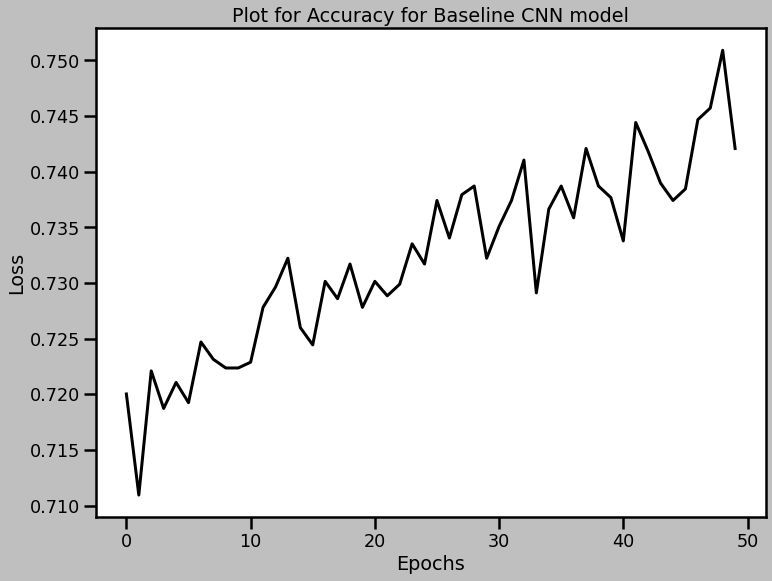

In [37]:
pd.DataFrame(cnn_history.history)['accuracy'].plot(figsize=(12,9));
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot for Accuracy for Baseline CNN model');

In [38]:
cnn_acc = cnn_model.evaluate(tf.expand_dims(X_test_tensor, axis = -1), y_test_tensor)[1]

121/121 [==============================] - 0s 2ms/step - loss: 0.7371 - accuracy: 0.7491


In [39]:
print(f"Baseline Feedfoward\tAccuracy: {ff_acc:.2f}\nBaseline ConvNet1D\tAccuracy: {cnn_acc:.2f}")

Baseline Feedfoward	Accuracy: 0.83
Baseline ConvNet1D	Accuracy: 0.75


# We can conclude from the two graphs that the FF model is less noisy and more robust